# Mean Square Error and the Bias-Variance Tradeoff

This code shows a proof that Mean Square Error (MSE) = Variance + Bias-squared for a single point estimate. Followed by how this can be applied to model selection.


By standard definition, MSE of an estimator (some function of the data) is the expected value of the squared-difference between the expected value of the estimator and the true value. 

MSE(θ^) = E[(θ^ - θ)**2]


The Bias of an estimator is the difference between the expected value of the estimator and the true value of the estimator.

Bias(θ^) = E[θ^] - θ


The Variance of an estimator is the expected value of the squared difference between values of the estimator and the expected value of the estimator.

Var(θ^) = E[(θ^ - E(θ^))**2]


Bias-Variance Decomposition: MSE(θ^) = Variance + Bias-squared

## Start with creating an estimator



In [1]:
# calculate mean
def mean(numList):
    return round((float(sum(numList)) / len(numList) if len(numList) > 0 else 0),8)

# calculate standard deviation
def sd(numList):
    meanList = mean(numList)
    return round((float(((sum([(i - meanList)**2 for i in numList])) 
                 / (len(numList) - 1))**0.5)),8)



# make up some data
X = [0,1,2,3,4,5,6,7,8,9]
y = [2,15,27,36,48,57,63,73,80,95]

# define the sample size
n = len(X) if len(X) == len(y) else print("Sample sizes are not equal.")
   

# correlation coefficient
r = ((n * sum([i*y[z] for z, i in enumerate(X)]) - (sum(X) * sum(y))) 
     / ((n * sum([i**2 for i in X]) - sum(X)**2) * (n * sum([i**2 for i in y]) - sum(y)**2))**0.5)

# slope
slope = round((r * (sd(y) / sd(X))),0)

# intercept
intercept = round((mean(y) - slope * mean(X)),0)


# return the function
print("θ^ = {} + {}x".format(intercept,slope))

θ^ = 5.0 + 10.0x


## Use estimator to calculate expected values

In [2]:
# for each x, what is the expected value of y?
thetaHat = list(map(lambda x: round((intercept + slope*x),8), X))

thetaHat

[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0]

In [3]:
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: TkAgg


## Plot the model line and y values

Text(0.5,0,'y')

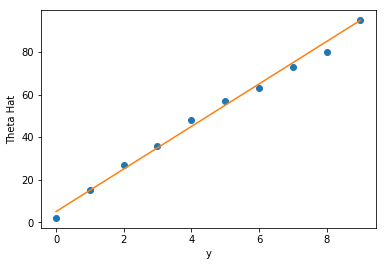

In [4]:
line = [slope*i+intercept for i in X]
plt.plot(X,y,'o', X, line)
plt.ylabel('Theta Hat')
plt.xlabel('y')


## The real values of y


In [5]:
# real values of y
theta = y

theta

[2, 15, 27, 36, 48, 57, 63, 73, 80, 95]

## Calculate MSE of estimator



<img src="Images/MSE1.PNG" alt="MSE">

In [6]:
# find the expected value of square difference between thetaHat and theta
MSE_theta_1 = mean([(thetaHat[num] - theta[num])**2 for num, est in enumerate(thetaHat)])

MSE_theta_1

6.0

## Subtract an estmator of theta from both thetas

<img src="Images/MSE2.PNG" alt="MSE2">

In [7]:
# expectated value of thetaHat
thetaHat_exp = mean(thetaHat)

# calculate new MSE of theta
MSE_theta_2 = mean([(thetaHat[num] - thetaHat_exp + thetaHat_exp - theta[num])**2 
                    for num, est in enumerate(thetaHat)])

if float(MSE_theta_2) == MSE_theta_1:
    print ("MATCH: {} = {}".format(MSE_theta_1, MSE_theta_2))
else:
    print("No Match: {} , {}".format(MSE_theta_1, MSE_theta_2))

MATCH: 6.0 = 6.0


## Distribute the binomial

<img src="Images/MSE3.PNG" alt="MSE3">

In [8]:
MSE_theta_3 = mean([(((thetaHat[num] - thetaHat_exp)**2) 
               + (2*((thetaHat[num] - thetaHat_exp) * (thetaHat_exp - theta[num]))) 
               + ((thetaHat_exp - theta[num])**2)) for num, est in enumerate(thetaHat)])


if MSE_theta_3 == MSE_theta_1:
    print ("MATCH: {} = {}".format(MSE_theta_1, MSE_theta_3))
else:
    print("No Match: {} , {}".format(MSE_theta_1, MSE_theta_3))

MATCH: 6.0 = 6.0


## Distribute the expectation

<img src="Images/MSE4.PNG" alt="MSE4">

In [9]:
MSE_theta_4 = (mean([(thetaHat[num] - thetaHat_exp)**2 for num, est in enumerate(thetaHat)]) 
               + mean([2*(thetaHat[num] - thetaHat_exp) * (thetaHat_exp - theta[num]) for num, est in enumerate(thetaHat)]) 
               + mean([(thetaHat_exp - theta[num])**2 for num, est in enumerate(thetaHat)]))


if MSE_theta_4 == MSE_theta_1:
    print ("MATCH: {} = {}".format(MSE_theta_1, MSE_theta_4))
else:
    print("No Match: {} , {}".format(MSE_theta_1, MSE_theta_4))

MATCH: 6.0 = 6.0


## Eliminate Crossterm


<img src="Images/MSE5.PNG" alt="MSE5">

In [10]:
# show that 2(E[θ^ - E[θ^]] * E[E[θ^] - θ]) = 0

(2 * mean([(thetaHat[num] - thetaHat_exp)for num, est in enumerate(thetaHat)]) 
   *  mean([(thetaHat_exp - theta[num]) for num, est in enumerate(thetaHat)]))

0.0

In [11]:
# show that 2 * (E[θ^] - E[θ^]) * (E[θ^] - E[θ]) = 0

(2 * (mean([thetaHat[num] for num, est in enumerate(thetaHat)]) - thetaHat_exp) 
   *  (thetaHat_exp - mean([(theta[num]) for num, est in enumerate(thetaHat)])))

0.0

In [12]:
# show that (θ^ - E[θ^]) = 0

mean([((num - thetaHat_exp)) for num in thetaHat])

0.0

In [13]:
MSE_theta_5 = (mean([(thetaHat[num] - thetaHat_exp)**2 for num, est in enumerate(thetaHat)])  
               + mean([(thetaHat_exp - theta[num])**2 for num, est in enumerate(thetaHat)]))


if MSE_theta_5 == MSE_theta_1:
    print ("MATCH: {} = {}".format(MSE_theta_1, MSE_theta_5))
else:
    print("No Match: {} , {}".format(MSE_theta_1, MSE_theta_5))

No Match: 6.0 , 1618.0


# <font color='red' >WHAT?!</font>

What is going on here? Maybe the Bias-Variance decomposition relates different subsets of training data for the same model...

### Compare to a smaller subset

In [14]:
thetaHat_TEST = thetaHat[1:9]
thetaHat_exp_TEST = mean(thetaHat_TEST)
theta_TEST = theta[1:9]

MSE_theta_6 = (mean([(thetaHat_TEST[num] - thetaHat_exp_TEST)**2 for num, est in enumerate(thetaHat_TEST)])  
               + mean([(thetaHat_exp_TEST - theta_TEST[num])**2 for num, est in enumerate(theta_TEST)]))


if MSE_theta_5 == MSE_theta_1:
    print ("MATCH: {} = {}".format(MSE_theta_5, MSE_theta_6))
else:
    print("No Match: {} , {}".format(MSE_theta_5, MSE_theta_6))

No Match: 1618.0 , 975.125


# <font color='red' >That's not it!   :,(</font>

Maybe our calculations are off..

## Check Calcuations for MSE and Variance against sklearn_mse and np.var

In [15]:
Var_Theta = mean([((num - thetaHat_exp)**2) for num in thetaHat])
Bias_Theta = mean([(thetaHat_exp - num) for num in theta])

print("Variance: {}, Bias: {}".format(Var_Theta, Bias_Theta))

Variance: 825.0, Bias: 0.4


In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

sklearn_mse = round(mean_squared_error(theta, thetaHat),8)
numpy_var = round(np.var(thetaHat),8)


print("sklearn MSE: {}, numpy Variance(θ^): {}".format(sklearn_mse, numpy_var))

sklearn MSE: 6.0, numpy Variance(θ^): 825.0


## Atleast we're calculating MSE and variance correctly, but what is going on?

Maybe all the textbooks are wrong and we've just discovered a fatal failure in mathematics...

### <font color='red' >Not so fast!</font> 

One more check, what about point estimates?



In [17]:
# use our simple model to produce an estimate for the variable 5

print("Our model: θ^ = {} + {}(5) = {}".format(intercept,slope,(intercept+slope*5)))

Our model: θ^ = 5.0 + 10.0(5) = 55.0


In [18]:
# instantiate a bunch of models
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge, SGDClassifier, ElasticNet
linear_reg = LinearRegression()
lasso_reg = Lasso()
ridge_reg = Ridge()
elasticNet_reg = ElasticNet()
SGD_reg = SGDClassifier(max_iter=3, tol=None)
log_reg = LogisticRegression()

estimators=[]


# list all the models
modelList = [linear_reg, lasso_reg, ridge_reg, elasticNet_reg, SGD_reg, log_reg]

# make X an array that can be used by the models
X = np.array(X).reshape(-1, 1)

# show what our model estimates
print("Our model: θ^ = {} + {}(5) = {}".format(intercept,slope,(intercept+slope*5)))
estimators.append(intercept+slope*5)

for i in modelList:
    model = i.fit(X, theta)    # fit model
    pred = i.predict(5)    # estimate      
    estimators.append(pred[0])     # add esimation to list of estimators
      
    print('Model: {} \nEstimate: {} \n\n'.format(i,pred))


Our model: θ^ = 5.0 + 10.0(5) = 55.0
Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) 
Estimate: [54.48484848] 


Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) 
Estimate: [54.42424242] 


Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 
Estimate: [54.42634731] 


Model: ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False) 
Estimate: [54.17714286] 


Model: SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=3, n_iter=None,
    

In [19]:
# what estimators were calculated?
estimators

[55.0,
 54.484848484848484,
 54.42424242424242,
 54.42634730538922,
 54.177142857142854,
 95,
 95]

In [20]:
# remember what the "true" value is?
theta[5]

57

In [21]:
# calculate MSE by "hand"
round(mean([(est - theta[5])**2 for est in estimators]),4)

417.079

In [22]:
# calculate MSE using sklearn
theta_5 = [theta[5] for est in estimators]
round(mean_squared_error(theta_5, estimators),4)

417.079

In [23]:
# MSE = variance + bias^2
thetaHat_exp_TEST = mean(estimators)

round((mean([(est - thetaHat_exp_TEST)**2 for est in estimators])  
               + (thetaHat_exp_TEST - theta[5])**2) ,4)

417.079

## Never Accept just one test

Let's write a function that will check each method of calculating MSE and check each value in our sample.

In [24]:
def compare_MSE(thetaValue, estimatorList):
    # calculate MSE by "hand"
    handMSE = round(mean([(est - thetaValue)**2 for est in estimatorList]),4)
    
    #sklearn MSE
    thetaVal_list = [thetaValue for est in estimatorList] # create list of the single 'true' as long as the estimator list
    sklearnMSE = round(mean_squared_error(thetaVal_list, estimatorList),4)
    
    # MSE = variance + bias^2
    estimatorHat_exp = mean(estimatorList)
    varBiasSqr = round((mean([(est - estimatorHat_exp)**2 for est in estimatorList])  
                        + (estimatorHat_exp - thetaValue)**2) ,4)
    
    if handMSE == sklearnMSE == varBiasSqr:
        print("{}: MATCH! Hand MSE: {} sklearn MSE: {} Var + Bias-squared: {}".format(thetaValue,handMSE,sklearnMSE,varBiasSqr))
    else:
        print("{}: No Match - Hand MSE: {} sklearn MSE: {} Var + Bias-squared: {}".format(thetaValue,handMSE,sklearnMSE,varBiasSqr))

In [25]:
for value in theta:

    estimators.append(intercept+slope*value)

    for i in modelList:
        model = i.fit(X, theta)    # fit model
        pred = i.predict(value)    # estimate      
        estimators.append(pred[0])     # add esimation to list of estimators
        
    compare_MSE(value,estimators)

2: MATCH! Hand MSE: 2900.4187 sklearn MSE: 2900.4187 Var + Bias-squared: 2900.4187
15: MATCH! Hand MSE: 5960.9961 sklearn MSE: 5960.9961 Var + Bias-squared: 5960.9961
27: MATCH! Hand MSE: 14002.4121 sklearn MSE: 14002.4121 Var + Bias-squared: 14002.4121
36: MATCH! Hand MSE: 24603.1488 sklearn MSE: 24603.1488 Var + Bias-squared: 24603.1488
48: MATCH! Hand MSE: 39702.5174 sklearn MSE: 39702.5174 Var + Bias-squared: 39702.5174
57: MATCH! Hand MSE: 57526.2582 sklearn MSE: 57526.2582 Var + Bias-squared: 57526.2582
63: MATCH! Hand MSE: 75874.638 sklearn MSE: 75874.638 Var + Bias-squared: 75874.638
73: MATCH! Hand MSE: 96569.9933 sklearn MSE: 96569.9933 Var + Bias-squared: 96569.9933
80: MATCH! Hand MSE: 119202.9132 sklearn MSE: 119202.9132 Var + Bias-squared: 119202.9132
95: MATCH! Hand MSE: 146856.4099 sklearn MSE: 146856.4099 Var + Bias-squared: 146856.4099


## Still this is just one example

More to come!